In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")

48


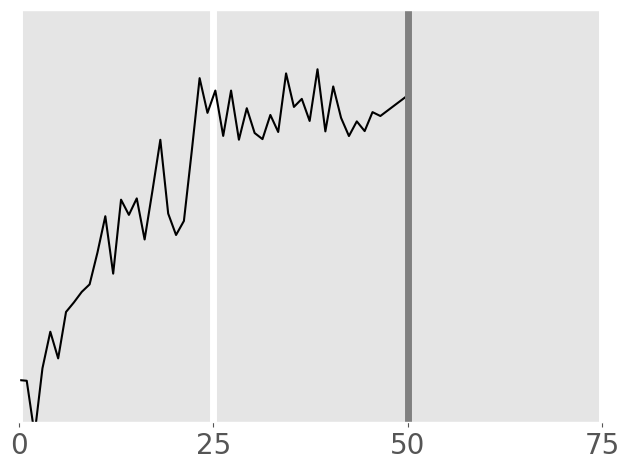

In [2]:
np.random.seed(10)

x = np.linspace(-10, 10, num=100)
jitter = np.random.normal(scale=100, size=x.shape)
y = (x**3) + jitter
x += 10

cutoff = 10
cutoff_idx = np.argwhere(np.abs(x - cutoff) < 5e-1)[0, 0]
x[cutoff_idx - 1] = cutoff

print(len(x[:cutoff_idx]))
plt.plot(x[:cutoff_idx], y[:cutoff_idx], color="black")

plt.axvline(cutoff, color="grey", lw=5)
plt.xticks([0, 5, 10, 15, 20], ["0", "25", "50", "75", "100"], fontsize=20)
plt.yticks([])
plt.ylim(-1000, 300)
plt.xlim(0, 15)
plt.grid(True, which="both", linewidth=5, color="white")

plt.tight_layout()
plt.savefig("notebook_plots/fc_task.png", dpi=300, bbox_inches="tight")
plt.show()

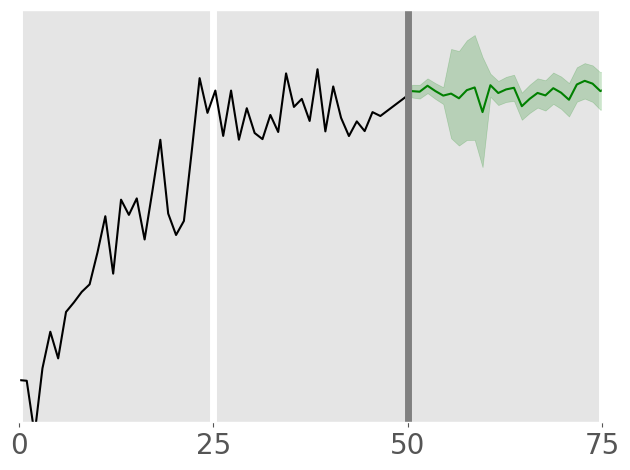

In [3]:
np.random.seed(10)

x = np.linspace(-10, 10, num=100)
jitter = np.random.normal(scale=100, size=x.shape)
true_jitter = np.random.normal(scale=20, size=x.shape)
y = (x**3) + jitter
y_true = (x**2) + true_jitter + 34

x += 10
cutoff = 10
cutoff_idx = np.argwhere(np.abs(x - cutoff) < 5e-1)[0, 0]
x[cutoff_idx - 1] = cutoff


plt.plot(x[:cutoff_idx], y[:cutoff_idx], color="black")
plt.plot(x[cutoff_idx + 2 :], y_true[cutoff_idx + 2 :], color="green")

variance = (
    np.ones_like(y_true[cutoff_idx + 2 :])
    * np.linspace(1, 5, num=len(y_true[cutoff_idx + 2 :]))
    * 20
)
variance[5:10] *= 5
plt.fill_between(
    x[cutoff_idx + 2 :],
    y_true[cutoff_idx + 2 :] - variance,
    y_true[cutoff_idx + 2 :] + variance,
    color="green",
    alpha=0.2,
)

plt.xticks([0, 5, 10, 15, 20], ["0", "25", "50", "75", "100"], fontsize=20)
plt.yticks([])
plt.axvline(cutoff, color="grey", lw=5)
plt.ylim(-1000, 300)
plt.xlim(0, 15)

plt.grid(True, which="both", linewidth=5, color="white")

plt.tight_layout()
plt.savefig("notebook_plots/fc_forecast.png", dpi=300, bbox_inches="tight")
plt.show()

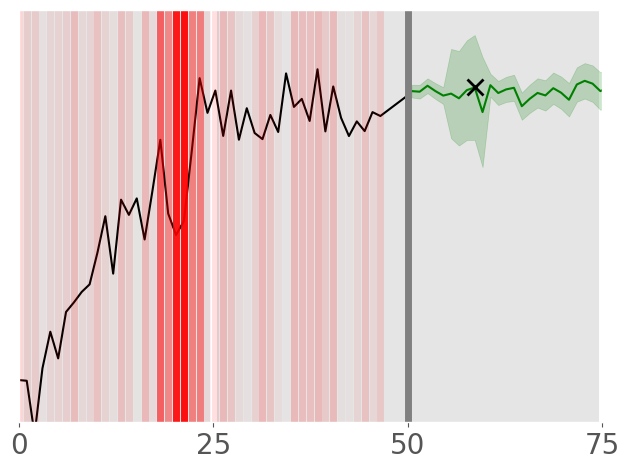

In [12]:
np.random.seed(10)

x = np.linspace(-10, 10, num=100)
jitter = np.random.normal(scale=100, size=x.shape)
true_jitter = np.random.normal(scale=20, size=x.shape)
y = (x**3) + jitter
y_true = (x**2) + true_jitter + 34

x += 10
cutoff = 10
cutoff_idx = np.argwhere(np.abs(x - cutoff) < 5e-1)[0, 0]
x[cutoff_idx - 1] = cutoff


plt.plot(x[:cutoff_idx], y[:cutoff_idx], color="black")
plt.plot(x[cutoff_idx + 2 :], y_true[cutoff_idx + 2 :], color="green")

variance = (
    np.ones_like(y_true[cutoff_idx + 2 :])
    * np.linspace(1, 5, num=len(y_true[cutoff_idx + 2 :]))
    * 20
)
variance[5:10] *= 5
plt.fill_between(
    x[cutoff_idx + 2 :],
    y_true[cutoff_idx + 2 :] - variance,
    y_true[cutoff_idx + 2 :] + variance,
    color="green",
    alpha=0.2,
)

attributions = np.random.uniform(low=0, high=0.2, size=x[:cutoff_idx].shape)
attributions[18:24] = np.random.uniform(
    low=0.1, high=0.99, size=attributions[18:24].shape
)
for i, attr in enumerate(attributions):
    x_value = x[:cutoff_idx][i]
    plt.axvline(
        x=x_value,
        color="r",
        alpha=attr,
        linewidth=5,
    )
plt.plot(
    x[58],
    y_true[58],
    color="black",
    linestyle="dashed",
    marker="x",
    markersize=12,
    markeredgewidth=2,
)

plt.xticks([0, 5, 10, 15, 20], ["0", "25", "50", "75", "100"], fontsize=20)
plt.yticks([])
plt.axvline(cutoff, color="grey", lw=5)
plt.ylim(-1000, 300)
plt.xlim(0, 15)

plt.grid(True, which="both", linewidth=5, color="white")

plt.tight_layout()
plt.savefig("notebook_plots/fc_explanation.png", dpi=300, bbox_inches="tight")
plt.show()